In [22]:
import keras
from keras.layers import Input, Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from keras.datasets import mnist
digits = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Images, in greyscale, are really just bytes running 0-255. Which is convinient,since keras needs every bit of data to be numerical

In [6]:
np.set_printoptions(linewidth=90, formatter={'all': lambda x: '{0}'.format(x)})
for row in train_images[0]:
    print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0]
[0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0]
[0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0]
[0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 

Now, let's actually see this as an image

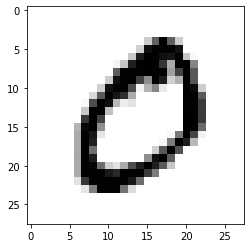

In [7]:
plt.imshow(train_images[1], cmap='binary')

In [8]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

To normalize data, to increase the accuracy.

In [9]:
np.set_printoptions(precision=4)
(train_images[0] / train_images.max())[5:15]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.0118, 0.0706, 0.0706, 0.0706, 0.4941, 0.5333, 0.6863, 0.102 ,
        0.651 , 1.    , 0.9686, 0.498 , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1176, 0.1412,
        0.3686, 0.6039, 0.6667, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.8824, 0.6745,
        0.9922, 0.949 , 0.7647, 0.251 , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1922, 0.9333, 0.9922,
        0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9843, 0.3647, 0.3216,
        0.3216, 0.2196, 0.1529, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0706, 0.8588, 0.9922,
        0.9922, 0.9922, 0.9922, 0.9922, 0.7765, 0.7137, 0.9686, 0.9451, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
    

So, thats input, images are just multidimensional arrays and you need to remember to normalize them into floating point ranging 0.0 to 1.0. Now for outputs, the images are 0-9 digits and each of these digits is a 'class'. not in the OO sense, but in the classification sense.

In [10]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Now, we want to make our labels discrete, which means our model should not predict the digit is 1.5, it should be only 1 or 2.<br>
for this we need to do one hot encoding

In [11]:
keras.utils.to_categorical(train_labels,10)[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

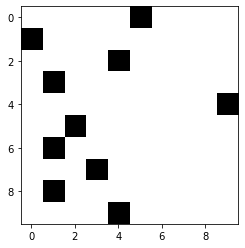

In [12]:
plt.imshow(keras.utils.to_categorical(train_labels, 10)[:10], cmap='binary')

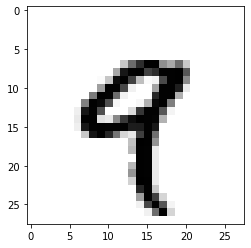

In [13]:
plt.imshow(train_images[4],cmap='binary')

Data prep Cookbook:<br>
<li>Tensors are just multidimensional arrays</li>
<li>Set them up as (image, x,y) with the pixels being 0.0 and 1.0. Convert pixels to float values.</li>
<li>Labels or classes are just array</li>
<li>Set them up as (image, no of classes)</li>
<li>Use one-hot encoding, set target lable to 1 and other to 0.


NOw let's get started

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [19]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [20]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000, 10))

#### Getting these both the shapes exactly same is really important before going to build model

Building Model
This is a functional model.
There is another sequential model you can check

In [25]:
input_layer = Input(shape=x_train[0].shape)
dense_1 = Dense(32, activation='relu')(input_layer)
dropout_1 = Dropout(0.1)(dense_1)
dense_2 = Dense(32, activation='relu')(dropout_1)
dropout_2 = Dropout(0.1)(dense_2)
flat = Flatten()(dropout_2)
output_layer = Dense(10, activation='softmax')(flat)

model = keras.Model(input=[input_layer], outputs=[output_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 28, 32)            928       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 28, 32)            1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                8970

/home/sanket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(x_train, y_train,
                   batch_size=32,
                   epochs=8,
                   verbose=1,
                   validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 32s 533us/step - loss: 0.3673 - accuracy: 0.8910 - val_loss: 0.1816 - val_accuracy: 0.9475
Epoch 2/8
60000/60000 [==============================] - 19s 318us/step - loss: 0.1850 - accuracy: 0.9443 - val_loss: 0.1426 - val_accuracy: 0.9576
Epoch 3/8
60000/60000 [==============================] - 20s 328us/step - loss: 0.1559 - accuracy: 0.9534 - val_loss: 0.1221 - val_accuracy: 0.9640
Epoch 4/8
60000/60000 [==============================] - 19s 316us/step - loss: 0.1407 - accuracy: 0.9571 - val_loss: 0.1238 - val_accuracy: 0.9640
Epoch 5/8
60000/60000 [==============================] - 16s 269us/step - loss: 0.1307 - accuracy: 0.9601 - val_loss: 0.1186 - val_accuracy: 0.9661
Epoch 6/8
60000/60000 [==============================] - 16s 266us/step - loss: 0.1272 - accuracy: 0.9613 - val_loss: 0.1135 - val_accuracy: 0.9661
Epoch 7/8
60000/60000 [==============================] - 16s 2